# Exploring parameters

#### density plots, post predictive checks etc.

In [1]:
%load_ext autoreload
%autoreload 2
import os.path as op
import tempfile

import matplotlib.pyplot as plt


import hnn_core
from hnn_core import simulate_dipole, jones_2009_model
from hnn_core.viz import plot_dipole


import sys
sys.path.append('../code/')
sys.path.append('../code/utils/')
#sys.path.append('../code/sbi/')
#sys.path.append('../../results_cluster/')


import numpy as np
import torch

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt


import os

work_dir = '/home/ubuntu/sbi_for_eeg_data/code/'

os.chdir(work_dir)

#from utils.plot import cov, compare_vars, plot_varchanges
#from utils.plot import compare_KLs, plot_KLs
#from sbi.inference import potentials
import utils.sbi_modulated_functions

# sbi
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer
from sbi.inference import SNPE, prepare_for_sbi, simulate_for_sbi

from sbi.analysis import conditional_pairplot, conditional_corrcoeff



# import the summary statistics that you want to investigate
from summary_features.calculate_summary_features import calculate_summary_statistics_alternative as alternative_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal as temporal_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_number as number_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal


In [2]:
print(torch.__version__)

1.9.1+cu102


In [3]:
## defining neuronal network model

num_params = 17

from utils.simulation_wrapper import set_network_default, SimulationWrapper
sim_wrapper = SimulationWrapper(num_params, noise=False)


In [4]:
window_len = 30

if num_params == 6:
    
    prior_min_fix = [0.0, 11.3, 0.0, 43.8, 0.0, 89.491]
    prior_max_fix = [0.160, 35.9, 0.821, 79.0, 8.104, 162.110]

    prior_min = [0.0, 11.3, 0.0, 43.8, 0.0, 89.491]
    prior_max = [0.160, 35.9, 0.821, 79.0, 8.104, 162.110]
    #true_params = torch.tensor([[26.61, 63.53,  137.12]])
    true_params = torch.tensor([[0.0274, 19.01, 0.1369, 61.89, 0.1435, 120.86]])

    

if num_params == 25:
    prior_min = [0, 0, 0, 0, 0, 0, 0, 0, 13.3,    # prox1 weights
                 0, 0, 0, 0, 0, 0, 51.980,            # distal weights
                 0, 0, 0, 0, 0, 0, 0, 0, 112.13]       # prox2 weights


    # ampa, nmda [0.927, 0.160, 2.093, 0.0519,        1.0, 1.0, 1.0, 1.0, 35.9,
    #           0.0394, 0.000042, 0.039372,           0.854, 0.117,  0.480, 75.08,
    #            0.000018, 8.633, 0.05375, 4.104,     1.0, 1.0, 1.0, 1.0, 162.110]

    prior_max = [0.927, 1.0, 0.160, 1.0,  2.093, 1.0, 0.0519, 1.0, 35.9,
                 0.0394, 0.117, 0.000042, 0.025902, 0.854, 0.480, 75.08,
                 0.000018, 1.0, 8.633, 1.0, 0.05375, 1.0, 4.104,  1.0, 162.110]

    true_params = torch.tensor([[0.277, 0.3739, 0.0399, 0.0, 0.6244, 0.3739, 0.034, 0.0, 18.977,
                                 0.011467, 0.06337, 0.000012, 0.013407, 0.466095, 0.0767, 63.08,
                                 0.000005, 0.116706, 4.6729, 0.016733, 0.011468, 0.061556, 2.33, 0.0679, 120.86]])
    
if num_params == 17:
    
    prior_min = [0, 0, 0, 0, 0, 13.3,  0, 0, 0, 0, 0, 51.980, 0, 0, 0, 0, 112.13]
    prior_max = [0.927, 0.160, 2.093, 1.0, 1.0, 35.9, 0.000042, 0.039372, 0.025902,  0.480, 0.117, 75.08, 8.633, 4.104, 1.0, 1.0, 162.110]

    true_params = torch.tensor([[0.277, 0.0399, 0.6244, 0.3739, 0.0, 18.977, 0.000012, 0.0115, 0.0134,  0.0767, 0.06337, 63.08, 4.6729, 2.33, 0.016733, 0.0679, 120.86]])


prior = utils.torchutils.BoxUniform(low=prior_min, high=prior_max)

#number_simulations = 10
density_estimator = 'nsf'


In [5]:

#assert (prior.event_shape==torch.Size([25]))
from utils import inference

In [10]:
from utils import inference

import pickle
from data_load_writer import *
from data_load_writer import load_from_file as lf

import os

work_dir = '/home/ubuntu/'

os.chdir(work_dir)



import os

print(os.getcwd())

#os.chdir('/home/kathi/Documents/Master_thesis/results_cluster/')



#print(os.getcwd())

#os.chdir('/home/kathi/Documents/Master_thesis/results_cluster')

## loading simulations from previously saved computations
#file = 'ERP_sequential_3params/step3'
#file = 'ERP_save_sim_nsf_num_params3'
#file = 'eval_features'
#file = '10000_multi_round_num_params_25newparams'

file = 'multi_round_10000_17params_save_single_posteriors'


print(os.getcwd())

os.chdir('results')


print(os.getcwd())
  

#thetas = torch.load('{}/thetas.pt'.format(file))

posterior = torch.load('{}/posterior.pt'.format(file))

#neural_dens = torch.load('{}/neural_dens.pt'.format(file))
#x_without = torch.load('{}/obs_without.pt'.format(file))

#x = calculate_summary_stats_temporal(x_without)


#true_params = torch.tensor([[0.0274, 19.01, 0.1369, 61.89, 0.1435, 120.86]])
#true_params = torch.tensor([[  18.9700, 63.5300, 137.1200]])
#true_params = torch.load('results/{}/true_params.pt'.format(file))
#true_params = torch.tensor([[0.277, 0.0399, 0.3739, 0.034, 18.977, 0.0115, 0.000012, 0.466, 0.06337, 0.0134, 0.0766, 63.08, 0.000005, 4.6729, 0.0115, 0.3308, 120.86]])

posteriors_round =  torch.load('{}/posteriors_each_round.pt'.format(file))
obs_real = torch.load('{}/obs_real.pt'.format(file))

/home/ubuntu
/home/ubuntu
/home/ubuntu/results


In [11]:
posterior = posteriors_round[1]

In [12]:
#obs_real_stat2 = calculate_summary_stats_temporal(obs_real[0])

samples = posterior.sample((100,))

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

                        constant for `log_prob()`. However, only
                        0% posterior samples are within the
                        prior support. It may take a long time to collect the
                        remaining 100 samples.
                        Consider interrupting (Ctrl-C) and either basing the
                        estimate of the normalizing constant on fewer samples (by
                        calling `posterior.leakage_correction(x_o,
                        num_rejection_samples=N)`, where `N` is the number of
                        samples you want to base the
                        estimate on (default N=10000), or not estimating the
                        normalizing constant at all
                        (`log_prob(..., norm_posterior=False)`. The latter will
                        result in an unnormalized `log_prob()`.


In [13]:
parameter_names = ["prox1_ampa_l2_bas","prox1_ampa_l2_pyr","prox1_ampa_l5_bas","prox1_nmda_l5_bas", "prox1_nmda_l5_pyr",
 "t_prox1",
 "dist_ampa_l2_pyr","dist_ampa_l2_bas","dist_nmda_l2_pyr",
 "dist_nmda_l5_pyr","dist_nmda_l2_bas",
 "t_dist", 
 "prox2_ampa_l2_pyr","prox2_ampa_l5_pyr","prox2_nmda_l2_pyr","prox2_nmda_l5_pyr",
 "t_prox2"]

if num_params ==6:
    parameter_names = ["prox_1_ampa_l2_pyr",
     "t_evprox_1",
     "dist_nmda_l2_pyr",
     "t_evdist_1", 
     "prox_2_ampa_l5_pyr",
     "t_evprox_2"]

In [14]:
s_x = inference.run_only_sim(samples, simulation_wrapper=sim_wrapper, num_workers=8)

param sizeparam sizeparam size   17param size
early stop  17
early stopparam sizeparam size 200.0200.0 
 
param size 17 17param size 171717
param sizeparam size

  
17
early stop early stopearly stop17   200.0200.0

200.0
param size  17


param size early stopearly stop param size 200.0   17

17200.0param size 
early stopparam size    1717

200.0
17

param size  17
num_params 17num_params
num_params 17
 num_params17 17
joblib will run over 1 jobsjoblib will run over 1 jobs


joblib will run over 1 jobsnum_params
 joblib will run over 1 jobs
num_params 17num_params
17
 17
joblib will run over 1 jobsjoblib will run over 1 jobs[Parallel(n_jobs=8)]: Using backend MultiprocessingBackend with 8 concurrent workers.


joblib will run over 1 jobs
num_params 17
joblib will run over 1 jobs
Loading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/hnn_core/mod/x86_64/.libs/libnrnmech.so
Building the NEURON model
Loading custom mechanism files from /home/u

running trial 1 on 1 cores[Done]

running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time

Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 120.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Simulation time: 120.0 ms...
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 160.0 ms...
Simulation time: 160.0 ms...
Simulation time: 160.0 ms...
Simulation time: 150.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 140.0 ms...
Simulation time: 170.0 ms...
Simulation time: 170.0 ms...
Simulation tim

param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
Simulation time: 190.0 ms...[Parallel(n_jobs=8)]: Done  52 tasks      | elapsed: 12.1min

[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Building the NEURON model
Simulation time: 180.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
obs [-0.57081002 -0.57066012 -0.57047281 ... 13.81214262 13.76616226
 13.72020775]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  53 tasks      | elapsed: 12.2min
Simulation time: 190.0 ms...
Building the NEURON model
obs [-0.59701968 -0.59775882 -0.5984867  ...  9.48033783  9.44995639
  9.41958481]
param size 17
early stop 200.0
param size  17
[Parallel(n_jobs=8)]: Done  54 tasks      | elapsed: 12.2min
num_params 17
joblib will run over 1 jobs
Simulation time: 10.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Building the NEURON model
Simulati

Simulation time: 40.0 ms...
Simulation time: 60.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 90.0 ms...
Simulation time: 20.0 ms...
Simulation time: 50.0 ms...
Simulation time: 30.0 ms...
Simulation time: 70.0 ms...
Simulation time: 30.0 ms...
Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
Simulation time: 100.0 ms...
Simulation time: 30.0 ms...
Simulation time: 60.0 ms...
Simulation time: 40.0 ms...
Simulation time: 80.0 ms...
Simulation time: 40.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 110.0 ms...
Simulation time: 40.0 ms...
Simulation time: 70.0 ms...
Simulation time: 50.0 ms...
Simulation time: 90.0 ms...
Simulation time: 50.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 120.0 ms...
Simulation time: 80.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
Simulation time: 

Simulation time: 150.0 ms...
Building the NEURON model
Simulation time: 110.0 ms...
Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Simulation time: 170.0 ms...
Simulation time: 130.0 ms...
Simulation time: 160.0 ms...
Simulation time: 160.0 ms...
Simulation time: 120.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 180.0 ms...
Simulation time: 140.0 ms...
Simulation time: 170.0 ms...
Simulation time: 170.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 130.0 ms...
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 190.0 ms...
Simulation time: 150.0 ms...
Simulation time: 180.0 ms...
Simulation time: 180.0 ms...
Simulation time: 10.0 ms...
Simulation time: 140.0 ms...
Simulation time: 160.0 ms...
Simulation time: 160.0 ms...
obs [-0.54112979 -0.54083216 -0.54049539 ... 15.42958371 15.3804251
 15.33126514]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run o

In [15]:
### sample from prior now
num_samples = 100
samples_prior = []


for i in range(num_samples):
    sample = prior.sample()
    samples_prior.append(sample)
    

In [16]:
    
s_x_prior = inference.run_only_sim(samples_prior, sim_wrapper, num_workers=8)

param sizeparam sizeparam size 17
 param size17 200.017early stop
early stop 
 early stop200.0param sizeparam size param sizeparam size
 200.0  

param size 171717param size  
 
early stop17early stop
  17
200.0
param size 
 early stop17
early stop  200.0200.0
param size  
200.0 17
17early stop 
param size 17

 17param size  
param size 17
  17200.0

param size  17
num_params num_params17 
17
num_paramsnum_params 17 17

joblib will run over 1 jobsnum_params
joblib will run over 1 jobsnum_params
 joblib will run over 1 jobsjoblib will run over 1 jobs17


 num_params17 joblib will run over 1 jobs17


joblib will run over 1 jobsjoblib will run over 1 jobs

[Parallel(n_jobs=8)]: Using backend MultiprocessingBackend with 8 concurrent workers.
num_params 17
joblib will run over 1 jobs
Loading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/hnn_core/mod/x86_64/.libs/libnrnmech.soLoading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_e

Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 30.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 40.0 ms...
Simulation time: 10.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
Simulation time: 20.0 ms...
Simulation time: 50.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 50.0 ms...
Simulation time: 30.0 ms...
Si

Simulation time: 130.0 ms...
Simulation time: 120.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 90.0 ms...
Simulation time: 140.0 ms...
Simulation time: 120.0 ms...
Simulation time: 160.0 ms...
Simulation time: 140.0 ms...
Simulation time: 110.0 ms...
Simulation time: 130.0 ms...
Simulation time: 110.0 ms...
Simulation time: 150.0 ms...
Simulation time: 100.0 ms...
Simulation time: 170.0 ms...
Simulation time: 130.0 ms...
Simulation time: 150.0 ms...
Simulation time: 120.0 ms...
Simulation time: 140.0 ms...
Simulation time: 120.0 ms...
Simulation time: 160.0 ms...
Simulation time: 110.0 ms...
Simulation time: 180.0 ms...
Simulation time: 140.0 ms...
Simulation time: 160.0 ms...
Simulation time: 130.0 ms...
Simulation time: 170.0 ms...
Simulation time: 150.0 ms...
Simulation time: 130.0 ms...
Simulation time: 120.0 ms...
Simulation time: 190.0 ms...
Simulation time: 150.0 ms...
Simulation time: 170.0 ms...
Simulation time: 140.0 ms...
Simulation time

Simulation time: 190.0 ms...
Simulation time: 170.0 ms...
Simulation time: 170.0 ms...
Simulation time: 20.0 ms...
Simulation time: 180.0 ms...
Simulation time: 170.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 60.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 32.60863653 32.51015302
 32.41166533]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  52 tasks      | elapsed: 12.1min
Simulation time: 30.0 ms...
Simulation time: 180.0 ms...
Simulation time: 180.0 ms...
Building the NEURON model
Simulation time: 190.0 ms...
Simulation time: 180.0 ms...
Simulation time: 10.0 ms...
Simulation time: 70.0 ms...
Simulation time: 40.0 ms...
Simulation time: 190.0 ms...
Simulation time: 190.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 21.19738902 21.12853687
 21.05970315]
param size 17
early stop 200.0
param size  17
Simulation time: 190.0 ms...
num_params 17
joblib will run over 

[Done]
running trial 1 on 1 cores
Simulation time: 20.0 ms...
Simulation time: 0.03 ms...
Simulation time: 130.0 ms...
Simulation time: 20.0 ms...
Simulation time: 100.0 ms...
Simulation time: 60.0 ms...
Simulation time: 30.0 ms...
Simulation time: 10.0 ms...
Simulation time: 30.0 ms...
Simulation time: 140.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 30.0 ms...
Simulation time: 110.0 ms...
Simulation time: 70.0 ms...
Simulation time: 20.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 150.0 ms...
Simulation time: 40.0 ms...
Simulation time: 10.0 ms...
Simulation time: 120.0 ms...
Simulation time: 80.0 ms...
Simulation time: 50.0 ms...
Simulation time: 30.0 ms...
Simulation time: 50.0 ms...
Simulation time: 160.0 ms...
Simulation time: 50.0 ms...
Simulation time: 130.0 ms...
Simulation time: 20.0 ms...
Simulation time: 60.0 ms...
Simulation time: 90.0 ms...
Simulation time: 40.0 ms...
Simulation time: 60.0 ms...


Simulation time: 160.0 ms...
Simulation time: 190.0 ms...
Simulation time: 110.0 ms...
Simulation time: 40.0 ms...
Simulation time: 110.0 ms...
Simulation time: 110.0 ms...
Simulation time: 100.0 ms...
Simulation time: 120.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 33.18451085 33.0793426
 32.97421129]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
Simulation time: 170.0 ms...
Simulation time: 120.0 ms...
Building the NEURON model
Simulation time: 50.0 ms...
Simulation time: 120.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 110.0 ms...
Simulation time: 130.0 ms...
Simulation time: 180.0 ms...
Simulation time: 130.0 ms...
Simulation time: 60.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 120.0 ms...
Simulation time: 190.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150

In [17]:
s_x_torch = torch.stack(([s_x[i] for i in range(39)]))
s_x_prior_torch = torch.stack(([s_x_prior[i] for i in range(39)]))


mean = torch.mean(s_x_torch, 0)
std = torch.std(s_x_torch, 0)

mean_prior = torch.mean(s_x_prior_torch, 0)
std_prior = torch.std(s_x_prior_torch, 0)

lower = mean - 1.96 * std


upper = mean + 1.96 * std


lower_prior = mean_prior - 1.96 * std_prior


upper_prior = mean_prior + 1.96 * std_prior



In [ ]:
obs_real = torch.load('{}/obs_real.pt'.format(file))

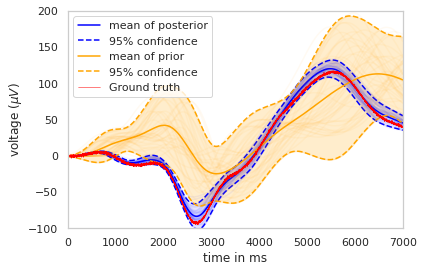

In [25]:
import seaborn as sns

sns.set() 

sns.set_style("whitegrid", {'axes.grid' : False})
#sns.set_style('ticks')

fig1, ax = plt.subplots(1, 1)
#ax.set_title("Comparing signal")

    
plt.plot(mean, color ='blue', label='mean of posterior')

for s in s_x[0:40]:
    plt.plot(s, alpha=0.05, color='blue')
    #plt.ylim(-30,30)
    plt.xlim(0, 7000)

plt.plot(lower, color='blue', linestyle='dashed', label='95% confidence')
plt.plot(upper, color='blue', linestyle='dashed')
plt.fill_between(x= torch.arange(len(mean_prior)), y1=lower, y2=upper, color='blue', alpha=0.1)
plt.xlim(0, 7000)
plt.ylim(-100, 200)


plt.plot(mean_prior, color ='orange', label='mean of prior')


for x_w in s_x_prior[0:40]:
    plt.plot(x_w, alpha=0.05, color='orange')

plt.plot(lower_prior, color='orange', linestyle='dashed', label='95% confidence')
plt.plot(upper_prior, color='orange', linestyle='dashed')
plt.fill_between(x= torch.arange(len(mean_prior)), y1=lower_prior, y2=upper_prior, color='orange', alpha=0.2)
plt.xlim(0, 7000)

plt.xlabel('time in ms')
#plt.ylabel('voltage ()')

fig1.gca().set_ylabel(r'voltage ($\mu V$)')
    
plt.plot(obs_real, label='Ground truth', color='red', linewidth=0.5)



plt.legend()

In [19]:
obs_real = torch.load('{}/obs_real.pt'.format(file))

In [ ]:
plt.save('thesis_4_7.png')